# Environment set-up

In [1]:
# %%capture
!pip install hazm
!pip install transformers
!pip install tensorflow
!pip install xgboost

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 8.2 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9300 sha256=c26af446d1debbd96c0adc715929bf8fd40539cf62ffd8b32ced53e05b2d8fd2
  Stored in directory: /root/.cache/pip/wheels/49/20/47/f03dfa8a7239c54cbc44ff7389eefbf888d2c1873edaaec888
Successfully built flashtext
  Attempting uninstall: numpy
    F

ERROR: Operation cancelled by user
^C
^C
^C


In [1]:
!pip install numpy==1.24.3
!pip install --force-reinstall gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.4 MB/s eta 0:00:00
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstall

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Tasnim_Classification/'
!mkdir Plots

Mounted at /content/drive
/content/drive/MyDrive/Tasnim_Classification
mkdir: cannot create directory ‘Plots’: File exists


In [ ]:
%%capture
## general python packages
import re
import pandas as pd
import os
import glob
from pandas.core.indexers.utils import length_of_indexer
from os import path
import ntpath
import numpy as np
import transformers
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import joblib
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import seaborn as sns
## NLP packages
import matplotlib.pyplot as plt
from string import punctuation
import gensim
from gensim.utils import simple_preprocess
import nltk
import hazm
from hazm import *
from hazm import stopwords_list
from hazm import word_tokenize
from collections import Counter

# Prepare Data

In [4]:
pwd

'/content/drive/MyDrive/Tasnim_Classification'

In [5]:
extract_dir = "/content/drive/MyDrive/Tasnim_Classification/Data"
base_dir = extract_dir
categories = ['Political', 'Sport']
final_dataframes = {}

In [6]:
for category in categories:
    category_path = os.path.join(base_dir, category)
    all_dfs = []

    for folder_num in range(2, 14):  # from 2 to 13
        folder_path = os.path.join(category_path, str(folder_num))
        csv_files = glob.glob(os.path.join(folder_path, 'CSVs', '*.csv'))
        txt_files = sorted(glob.glob(os.path.join(folder_path, 'TXTs', '*.txt')))

        if not csv_files:
            continue

        # Load CSV
        df = pd.read_csv(csv_files[0])

        # Load and attach descriptions
        descriptions = []
        for i in range(20):
            try:
                with open(txt_files[i], 'r', encoding='utf-8') as f:
                    descriptions.append(f.read())
            except IndexError:
                descriptions.append('')  # Handle missing txts
        df['description'] = descriptions

        all_dfs.append(df)

    # Concatenate all for this category
    final_df = pd.concat(all_dfs, ignore_index=True)
    final_dataframes[category] = final_df

    # Save final CSV
    final_df.to_csv(f'{base_dir}/{category}_news.csv', index=False, encoding='utf-8')

In [7]:
# Load the datasets
sport_df = pd.read_csv(f'{base_dir}/Sport_news.csv', encoding='utf-8')
political_df = pd.read_csv(f'{base_dir}/Political_news.csv', encoding='utf-8')

# Concatenate 'Title', 'Summary', and 'description' for sport news
# .fillna('') is used to handle any missing values and prevent errors
sport_df['Combined_Text'] = sport_df['Title'].fillna('') + ' ' + \
                            sport_df['Summary'].fillna('') + ' ' + \
                            sport_df['description'].fillna('')

# Concatenate 'Title', 'Summary', and 'description' for political news
political_df['Combined_Text'] = political_df['Title'].fillna('') + ' ' + \
                                political_df['Summary'].fillna('') + ' ' + \
                                political_df['description'].fillna('')

# Create a new DataFrame to store the combined news
all_news_df = pd.DataFrame()

# Determine the maximum length between the two dataframes to ensure all data is included
max_len = max(len(sport_df), len(political_df))

# Populate the 'Sport_News' column with combined text from sport news
# .reindex(range(max_len)) is used to align the series lengths,
# filling with NaN if one dataframe is shorter than the other
all_news_df['Sport_News'] = pd.Series(sport_df['Combined_Text']).reindex(range(max_len))

# Populate the 'Political_News' column with combined text from political news
all_news_df['Political_News'] = pd.Series(political_df['Combined_Text']).reindex(range(max_len))

# Save the new DataFrame to a CSV file named 'all_news.csv'
# index=False prevents pandas from writing the DataFrame index as a column in the CSV
all_news_df.to_csv(f'{base_dir}/all_news.csv', index=False, encoding='utf-8')


# Loading Data and get a brief overview of columns

In [8]:
df = pd.read_csv(f'{base_dir}/all_news.csv', encoding='utf-8')
print(f"Shape of my data: {df.shape}\n")
print(f"The number of null values for my data: \n{df.isnull().sum()}\n")
df=df.dropna()
print(f"Shape of my data after droping nulls: {df.shape}\n")
print(f"Number of duplicate text in `Sport_News` column of data: {df.shape[0] - df.drop_duplicates(subset=['Sport_News']).shape[0]}\n")
print(f"Number of duplicate text in `Political_News` column of data: {df.shape[0] - df.drop_duplicates(subset=['Political_News']).shape[0]}\n")
df.drop_duplicates(subset=["Sport_News"], inplace=True)
df.drop_duplicates(subset=["Political_News"], inplace=True)
df.reset_index(drop=True, inplace=True)
print(f"shape of data after dropping duplicate rows: {df.shape}\n")
print(f"colum's type of data : \n{df.dtypes}\n")

Shape of my data: (240, 2)

The number of null values for my data: 
Sport_News        0
Political_News    0
dtype: int64

Shape of my data after droping nulls: (240, 2)

Number of duplicate text in `Sport_News` column of data: 0

Number of duplicate text in `Political_News` column of data: 0

shape of data after dropping duplicate rows: (240, 2)

colum's type of data : 
Sport_News        object
Political_News    object
dtype: object



In [9]:
df.head()

,Sport_News,Political_News
0,تأیید 2 نامزد ریاست نجات غریق با وجود ابطال فر...,واکنش مجلس به جانبداری‌های آژانس بین المللی ان...
1,شکوری: صحبت‌هایی با استقلال شده اما با هوادار ...,مهاجرانی:تغییر ساعت مدارس با همین روال پیش خوا...
2,نایب قهرمانی تیم وزنه‌برداری ایران در آسیا تیم...,بازگشت مدیرعامل سابق پدیده شاندیز به زندان نما...
3,گولسیانی: شاید پرسپولیس به ماندن من علاقه ندار...,7 درصد گوشت مورد نیاز با ارز ترجیحی وارد می‌شو...
4,آل‌کثیر: حاضر بودم بسوزم و خودخوری کنم اما تیم...,لاریجانی: مشورت پذیری از ویژگی‌های شهید رئیسی ...


# Preprocessing & EDA

**The news vary in length depending on the number of words! Finding the most normal range could help us to find the maximum length of the sequences for the preprocessing step. On the other hand, we assume that the minimum word combination for a meaningful phrase for our learning process is 3.**

In [11]:
# calculate the length of comments based on their words
df['sport_len_by_words'] = df['Sport_News'].apply(lambda t: len(hazm.word_tokenize(t)))
df['political_len_by_words'] = df['Political_News'].apply(lambda t: len(hazm.word_tokenize(t)))


min_max_len_s = [df["sport_len_by_words"].min(), df["sport_len_by_words"].max()]
print(f'Sport: \n Min: {min_max_len_s[0]} \tMax: {min_max_len_s[1]}')
min_max_len_e = df["political_len_by_words"].min(), df["political_len_by_words"].max()
print(f'Political: \n Min: {min_max_len_e[0]} \tMax: {min_max_len_e[1]}')

Sport: 
 Min: 15 	Max: 1931
Political: 
 Min: 18 	Max: 2817


In [12]:
def data_gl_than(data, less_than=20, greater_than=0.0, col='comment_len_by_words'):
    data_length = data[col].values

    data_glt = sum([1 for length in data_length if greater_than < length <= less_than])

    data_glt_rate = (data_glt / len(data_length)) * 100

    print(f'Texts with a word length of more than {greater_than} and less than {less_than} comprise {data_glt_rate:.2f}% of the whole!')

In [14]:
data_gl_than(df, 1024, 3, "political_len_by_words")

Texts with a word length of more than 3 and less than 1024 comprise 91.67% of the whole!


In [15]:
data_gl_than(df, 1024, 3, "sport_len_by_words")

Texts with a word length of more than 3 and less than 1024 comprise 98.33% of the whole!


In [16]:
minlim, maxlim = 3, 1024

In [19]:
# Remove news less than three and greater than 1024 words in length
df['political_len_by_words'] = df['political_len_by_words'].apply(lambda len_t: len_t if minlim < len_t <= maxlim else None)
df = df.dropna(subset=['political_len_by_words'])

df = df.reset_index(drop=True)

In [20]:
df['sport_len_by_words'] = df['sport_len_by_words'].apply(lambda len_t: len_t if minlim < len_t <= maxlim else None)
df = df.dropna(subset=['sport_len_by_words'])
df = df.reset_index(drop=True)
print(f'Shape of my data: \n {df.shape}')

Shape of my data: 
 (217, 4)


**Preprocessing Steps**
- First, we normalize the columns. By normalize, I mean that we convert the data into a more human-readable form and remove a minimum of text features, such as spaces around punctuation marks, stop words, line breaks and etc.

In [21]:
class TextPreprocessing():
    """Class for preprocessing text data."""

    def __init__(self):
        self.normalizer = Normalizer()
        self.stemmer = Stemmer()
        self.lemmatizer = Lemmatizer()

    def weird_patterns(self, data):
        weird_pattern = re.compile(
          "["
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
          u"\U00002702-\U000027B0"
          u"\U000024C2-\U0001F251"
          u"\U0001f926-\U0001f937"
          u'\U00010000-\U0010ffff'
          u"\u200c"
          "]+", flags=re.UNICODE)
        return [weird_pattern.sub(r'', sent ) for sent in data]

    def normalize(self, news):
      return [(self.normalizer.normalize(new))for new in news]

    def sent_to_words(self, sentences):
      for sentence in sentences:
          yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

    def lemma(self, texts):
      return [[(self.lemmatizer.lemmatize(word))for word in text]for text in texts]

    def remove_stop_words(self, words):
      return [[token for token in word if token not in stopwords_list()]for word in words]


In [22]:
def column(text):
    data_normal = list(TP.normalize(text))
    clean_news = TP.weird_patterns(data_normal)
    data_words = list(TP.sent_to_words(clean_news))
    data_stop_words = list(TP.remove_stop_words(data_words))
    data_lemma = list(TP.lemma(data_stop_words))
    return data_lemma

In [23]:
TP = TextPreprocessing()
##Preprocessing on the sport column
df['tokens_sport'] = [" ".join(x) for x in column(df['Sport_News'].tolist())]
##Preprocessing on the political column
df['tokens_political'] = [" ".join(x) for x in column(df['Political_News'].tolist())]

In [25]:
df['political_label']= 0
df['sport_label']= 1

Spilit data (train = 0.85, validation = 0.05, test = 0.1)

In [30]:
train_df = pd.DataFrame({'text' : df.tokens_political.iloc[:int(len(df)*0.85)].to_list() + df.tokens_sport.iloc[:int(len(df)*0.85)].to_list() ,
                         'label' : df.political_label.iloc[:int(len(df)*0.85)].to_list() + df.sport_label.iloc[:int(len(df)*0.85)].to_list() })

validation_df = pd.DataFrame({'text' : df.tokens_political.iloc[int(len(df)*0.85):int(len(df)*0.9)].to_list() + df.tokens_sport.iloc[int(len(df)*0.85):int(len(df)*0.9)].to_list() ,
                         'label' : df.political_label.iloc[int(len(df)*0.85):int(len(df)*0.9)].to_list() + df.sport_label.iloc[int(len(df)*0.85):int(len(df)*0.9)].to_list() })

test_df = pd.DataFrame({'text' : df.tokens_political.iloc[int(len(df)*0.9):len(df)].to_list() + df.tokens_sport.iloc[int(len(df)*0.9):len(df)].to_list() ,
                         'label' : df.political_label.iloc[int(len(df)*0.9):len(df)].to_list() + df.sport_label.iloc[int(len(df)*0.9):len(df)].to_list() })

In [31]:
y_train = np.array(train_df['label'], dtype=np.int32)
y_validation = np.array(validation_df['label'], dtype=np.int32)
y_test = np.array(test_df['label'], dtype=np.int32)

#Logistic Regression(Scikit-Learn)

We’ll be using the LogisticRegression class from Scikit-learn, so we start there:

In [32]:
cv = CountVectorizer()
features = cv.fit_transform(train_df.text)


logistic_regression = linear_model.LogisticRegression(solver="lbfgs")
model = logistic_regression.fit(features, train_df.label)

input_values = ["وی ادامه داد: حمید بنی‌تمیم مدیرکل ورزش و جوانان خوزستان فقط به خانه المپیکی‌های استان رفت و به منزل هیچ کدام از پارالمپیکی‌ها از جمله من نیامد، مگر طلای من با طلای بقیه فرق می‌کند که این اقدام را انجام داد؟ چرا بین ورزشکاران تبعیض قائل می‌شوند؟ این دور از شأن یک ورزشکار مدال‌آور است"]
prediction = logistic_regression.predict(cv.transform(input_values)) #adding values for prediction
prediction = prediction[0]
if prediction == 0:
  print("political news")
else:
  print("sport news")

sport news


Accuracy

In [33]:
pred = logistic_regression.predict(cv.transform(test_df.text))
print(accuracy_score(test_df.label, pred))

1.0


# Random Forest(Scikit-Learn)

Random Forest builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

In [36]:
classifier_rf = RandomForestClassifier(random_state=24, n_jobs=-1, max_depth=2,
                                       n_estimators=100, oob_score=True)

In [37]:
#Fit data
classifier_rf.fit(features, train_df.label)

RandomForestClassifier(max_depth=2, n_jobs=-1, oob_score=True, random_state=24)

Accuracy

In [38]:
pred_rf = classifier_rf.predict(cv.transform(test_df.text))
print(accuracy_score(test_df.label, pred_rf))

0.9545454545454546


# XGBoost

XGBoost, which stands for Extreme gradient boosting. As the name suggests, XGBoost is an extreme and advanced version of gradient boosting that it is more flexible (i.e., regularization parameters) and more efficient (i.e., parallel computation).

In [39]:
# fit model no training data
model = XGBClassifier()
model.fit(features, train_df.label)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy

In [40]:
pred_XGB = model.predict(cv.transform(test_df.text))
print(accuracy_score(test_df.label, pred_XGB))

0.9772727272727273


# Evaluating the models

Finally, we use the Sklearn classification report and the confusion matrix to evaluate the models. First, we should predict the classes of the test data; then, by comparing the actual values with the predicted values, we can measure the performance of the model.

**Let's check the results of Logistic_regression model:**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        22

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



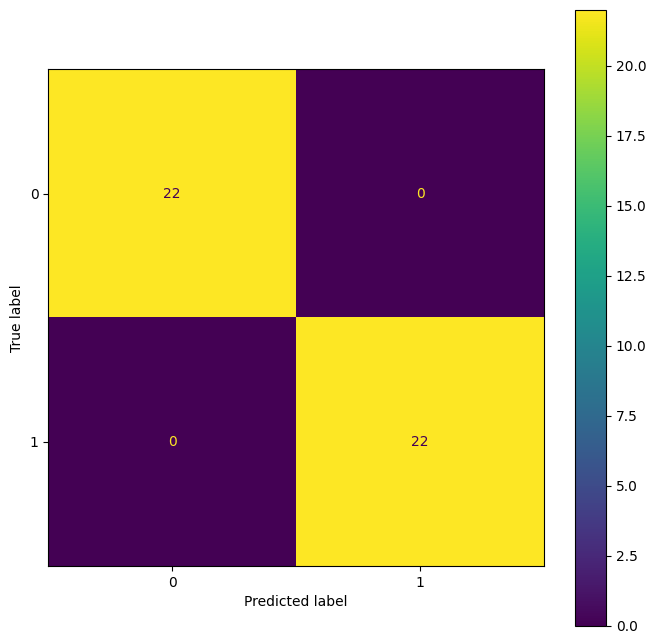

In [42]:
print(classification_report(test_df.label, pred))
fig, ax = plt.subplots(figsize=(8,8))
ConfusionMatrixDisplay.from_predictions(test_df.label, pred, ax=ax)
plt.savefig('Plots/Logistic_Regression_ConfusionMatrixDisplay.png')

**Let's check the results of Random Forest model:**

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.91      0.95        22

    accuracy                           0.95        44
   macro avg       0.96      0.95      0.95        44
weighted avg       0.96      0.95      0.95        44



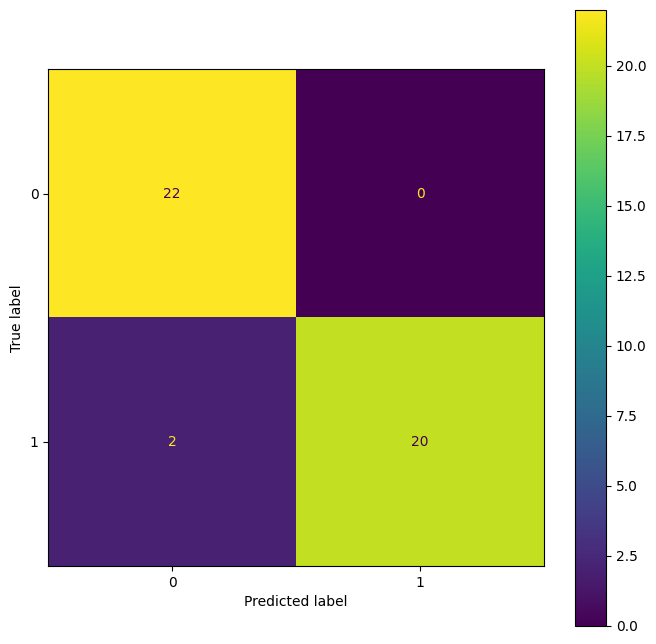

In [43]:
print(classification_report(test_df.label, pred_rf))
fig, ax = plt.subplots(figsize=(8,8))
ConfusionMatrixDisplay.from_predictions(test_df.label, pred_rf, ax=ax)
plt.savefig('Plots/Random_Forest_ConfusionMatrixDisplay.png')

**Let's check the results of XGBoost model:**

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.95      0.98        22

    accuracy                           0.98        44
   macro avg       0.98      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



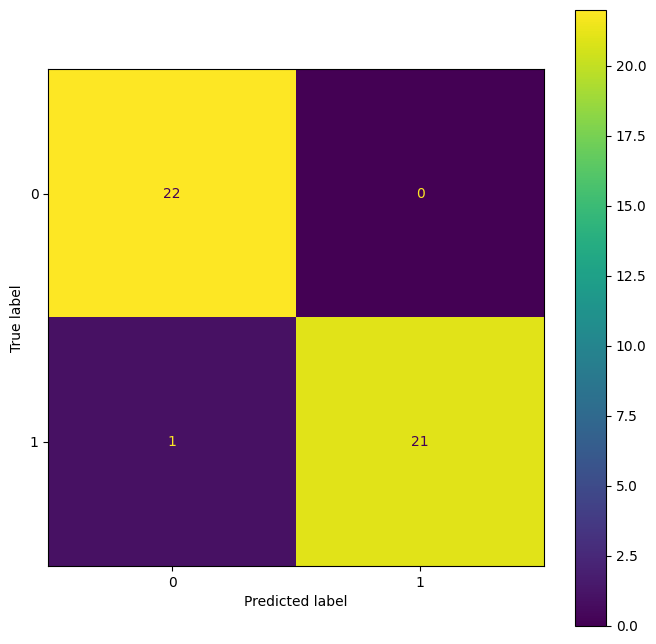

In [44]:
print(classification_report(test_df.label, pred_XGB))
fig, ax = plt.subplots(figsize=(8,8))
ConfusionMatrixDisplay.from_predictions(test_df.label, pred_XGB, ax=ax)
plt.savefig('Plots/Random_Forest_ConfusionMatrixDisplay.png')

#Inference(save&use)

**We use three models in this project (Logistic Regression, Random Forest, XGBoost). As we have seen, the best accuracy of the models is logistic regression with much better training time, but model gave us 100% accuracy which seems overfitted so by analyzing model the best model would be random forest based on the classification report**

**So we use random forest and save our model, load it and use it.**

In [49]:
# save the model to disk
filename = f'/content/drive/MyDrive/Tasnim_Classification/final_model.sav'
joblib.dump(model, filename)

['/content/drive/MyDrive/Tasnim_Classification/final_model.sav']

In [51]:
# load the model from disk
loaded_model = joblib.load(filename)
# test model
input_values = ["به گزارش خبرنگار ورزشی خبرگزاری فارس، ابوالفضل حسن‌زاده، رئیس کمیته انضباطی فدراسیون فوتبال با ارسال نامه‌ای به منصور قنبرزاده، نایب رئیس دوم و رئیس کارگروه ناظر بر قراردادهای این فدراسیون درخواست کرد کلیه قراردادهای ثبت شده از سوی باشگاه‌های حاضر در لیگ برتر به قید فوریت در این کارگروه تحت بررسی قرار گرفته است."]

prediction = loaded_model.predict(cv.transform(input_values)) #adding values for prediction
prediction = prediction[0]
if prediction == 0:
  print("political news")
else:
  print("sport news")

sport news


In [52]:
# load the model from disk
loaded_model = joblib.load(filename)
# test model
input_values = ["""
به گزارش گروه سیاسی خبرگزاری تسنیم، نشست مشترک سران قوای سه‌گانه ظهر امروز (شنبه) با حضور رئیس‌جمهور، رئیس مجلس شورای اسلامی و رئیس قوه قضائیه در نهاد ریاست‌جمهوری برگزار شد.

در این جلسه که به میزبانی رئیس‌جمهور انجام شد، مهم‌ترین موضوعات و تحولات جاری کشور مورد بررسی و تبادل نظر قرار گرفت.

جزییات بیشتری از محورهای مورد بحث این نشست تاکنون منتشر نشده است.
"""]

prediction = loaded_model.predict(cv.transform(input_values)) #adding values for prediction
prediction = prediction[0]
if prediction == 0:
  print("political news")
else:
  print("sport news")

political news
